In [58]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import numpy as np

import os
import sys

%matplotlib inline
plt.style.use('ggplot')

In [45]:
os.chdir(os.path.dirname(sys.path[0])) # Set current path as main

df = pd.read_csv(os.getcwd() + '/data/data.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1300 non-null   int64  
 1   PAY       1300 non-null   float64
 2   ACCEPTED  1300 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 KB


In [47]:
df.head()

,ID,PAY,ACCEPTED
0,786,27.352507,0
1,868,51.939040,1
2,846,24.451818,1
3,249,29.353959,1
4,434,20.568923,1


### 0's in PAY are considered as canceled

In [53]:
df[df['PAY']==0]

,ID,PAY,ACCEPTED
215,781,0.0,0
365,701,0.0,0
373,478,0.0,0
376,63,0.0,0
859,987,0.0,0
999,177,0.0,0


In [54]:
df_clean = df[df['PAY'] > 0] # Getting rid of zeros

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1294 non-null   int64  
 1   PAY       1294 non-null   float64
 2   ACCEPTED  1294 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 40.4 KB


## Adding up PAY, and ACCEPT by ID

In [140]:
df_1 = df_clean.groupby('ID')[['PAY', 'ACCEPTED']].sum()

In [141]:
df_1.head()

,PAY,ACCEPTED
ID,,
1,29.358732,0
2,22.986847,0
3,18.020348,0
4,77.749694,2
5,14.642845,0


## Distribution

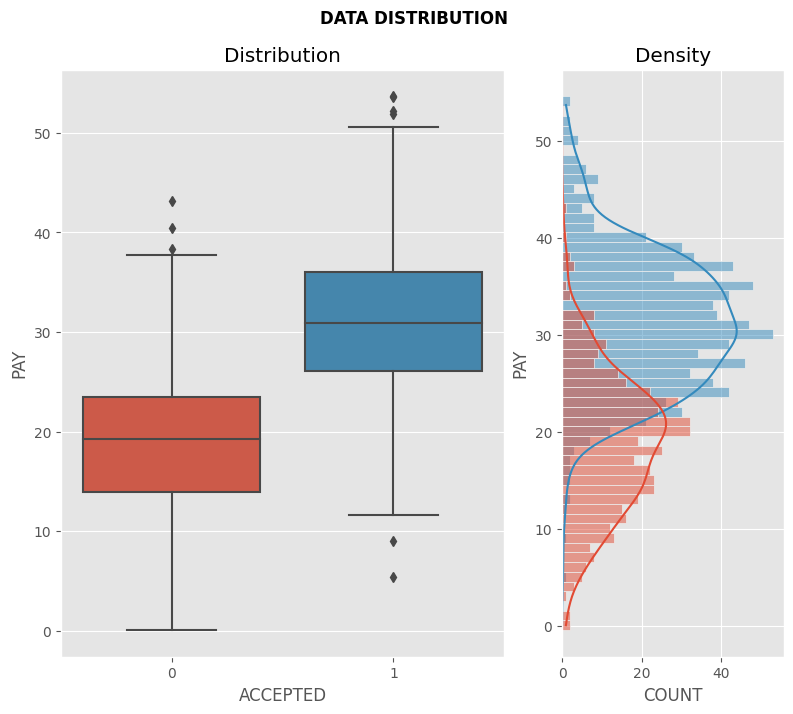

In [102]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1.5]}, figsize=(8,7))
fig.suptitle('DATA DISTRIBUTION\n', fontweight='bold')
fig.tight_layout()

sns.boxplot(ax=ax[0], data=df_clean, x='ACCEPTED', y='PAY')
ax[0].set_title('Distribution')

sns.histplot(ax=ax[1], data=df_clean, y='PAY', hue='ACCEPTED', kde=True, discrete=True)
ax[1].set_title('Density')
ax[1].legend_.remove()
ax[1].set_xlabel('COUNT')

plt.show()

In [104]:
iqr_0 = round(ss.iqr(df_clean[df_clean['ACCEPTED']==0]['PAY']), 2)
iqr_1 = round(ss.iqr(df_clean[df_clean['ACCEPTED']==1]['PAY']), 2)

print(
    'Interquantile range:\n'+
    f'      Accepted: {iqr_1}$\n'+
    f'      Not accepted: {iqr_0}$'
)

Interquantile range:
      Accepted: 9.89$
      Not accepted: 9.57$


In [105]:
pay_med = round(np.median(df_clean['PAY']), 2)

print(f'The median offered payment is: {pay_med}$')

The median offered payment is: 26.8$


## Poisson prob

In [135]:
def p_cdf(k:int, mu:int):
    '''
    Args
        k: number of expected rides
        mu: average of rides

    Return
        Cumulative distribution function plot
    '''
    k = np.arange(k+1)
    cdf = ss.poisson.cdf(k, mu)

    plt.plot(k, cdf, marker='o')
    plt.xlabel('k')
    plt.ylabel('Cumulative Probability')

def p_pmf(k:int, mu:int):
    '''
    Args
        k: number of expected rides
        mu: average of rides

    Return
        Probability mass function plot
    '''
    k = np.arange(k+1)
    cdf = ss.poisson.pmf(k, mu)

    plt.plot(k, cdf, marker='o')
    plt.xlabel('k')
    plt.ylabel('Mass Probability')

In [144]:
max_acc = df_1['ACCEPTED'].max()

print(f'{max_acc} is the number of maximum accepted rides')

5 is the number of maximum accepted rides


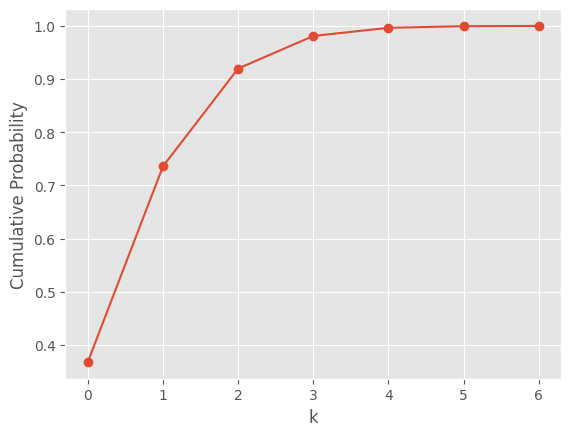

In [138]:
p_cdf(6, 1)

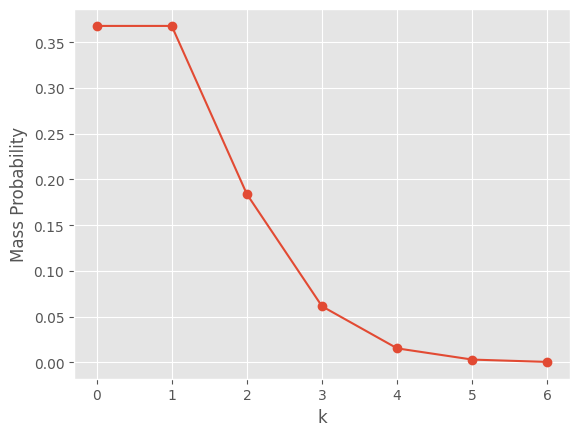

In [139]:
p_pmf(6, 1)

In [159]:
pmfs = {}
k = np.arange(10)

for mu in range(0, 20):
    pmf = ss.poisson.pmf(k, mu)
    pmfs[f'mu={mu}'] = np.round(pmf, 5)

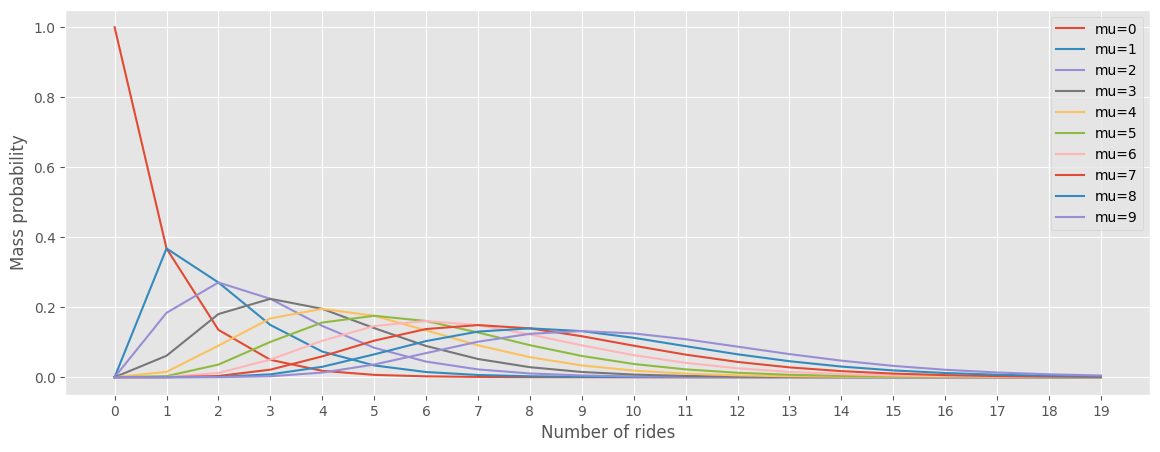

In [183]:
plt.figure(figsize=(14,5))
plt.plot(list(map(lambda x: str(x), range(20))), pmfs.values())
plt.legend(pmfs.keys())

plt.ylabel('Mass probability')
plt.xlabel('Number of rides')

plt.show()

## Profit calculation

In [187]:
month_1 = round(sum(df['PAY']) - (len(df) * 30), 2)

print(f'The month 1 profit is {month_1}$')

The month 1 profit is -4385.56$


### Acquisition over time

In [208]:
p_acq = round(sum(df.drop_duplicates()['ACCEPTED']) / len(df), 2)

print(f'The acquisition rate is {p_acq * 100}%')

The acquisition rate is 64.0%


In [224]:
customer_base = {}
x = 0

for month in range(1, 13):
    x += 1000
    x *= p_acq
    customer_base[f'Month {month}'] = int(x)

In [225]:
for k, v in customer_base.items():
    print(f'{k} has a retention of {v} customers')

Month 1 has a retention of 640 customers
Month 2 has a retention of 1049 customers
Month 3 has a retention of 1311 customers
Month 4 has a retention of 1479 customers
Month 5 has a retention of 1586 customers
Month 6 has a retention of 1655 customers
Month 7 has a retention of 1699 customers
Month 8 has a retention of 1727 customers
Month 9 has a retention of 1745 customers
Month 10 has a retention of 1757 customers
Month 11 has a retention of 1764 customers
Month 12 has a retention of 1769 customers


In [235]:
last_month = customer_base.get('Month 12')

print(f'Resulting in a total loss of {12000 - last_month} customers')

Resulting in a total loss of 10231 customers


In [237]:
print(f'And a total profit loss of {12 * month_1}$')

And a total profit loss of -52626.72$


In [245]:
pay_med_acc = round(np.mean(df_clean[df_clean['ACCEPTED']==1]['PAY']), 2)

print(f'The average payment per ride is {pay_med_acc}$')
print()
print(f'So this would be a total profit of {round((pay_med_acc - 30) * 12000, 2)}$ ideally keeping the total number of customers after concluding the 12 months')

The average payment per ride is 31.2$

So this would be a total profit of 14400.0$ ideally keeping the total number of customers after concluding the 12 months


### As shown in the Data distribution plot, values above 33$ are more likely to be accepted.
### Having a marging above 1$ benefit per acquisition would lead to positive profit